# Exercise 1
 <p><div class="lev1"><a href="#Task-A.-Another-LEGO-brick-in-the-wall"><span class="toc-item-num">Task A.&nbsp;&nbsp;</span>Another LEGO brick in the wall</a></div>
 <p><div class="lev1"><a href="#Task-B.-Drop-the-Bike"><span class="toc-item-num">Task B.&nbsp;&nbsp;</span>Drop the Bike</a></div>

In [1]:
# Add your imports here
import pandas as pd
import numpy as np
from datetime import datetime, date, time
import matplotlib.pyplot as plt
import math
pd.options.mode.chained_assignment = None  # default='warn', Mutes warnings when copying a slice from a DataFrame.

In [2]:
DATA_FOLDER = 'data'

## Task A. Another LEGO brick in the wall

LEGO is a popular brand of toy building bricks. They are often sold in sets in order to build a specific object. Each set contains a number of parts in different shapes, sizes and colors. This database contains information on which parts are included in different LEGO sets. It was originally compiled to help people who owned some LEGO sets already figure out what other sets they could build with the pieces they had.

This dataset contains the official LEGO colors, parts, inventories (i.e., sets of LEGO parts which assembled create an object in the LEGO world) and sets (i.e., sets of LEGO inventories which assembled create a LEGO ecosystem). The schema of the dataset can be shown in the following UML diagram: 

![lego-schema](lego-schema.png)

In this task you have to apply the following Data Wrangling pipeline:
1. Load your data into `Pandas`
* Explore it and clean its dirty parts
* Use it to answer a set of queries

Each of these subtasks are described in detail below.

### A1. Loading phase
Load all the csv files into different `DataFrames`. Use meaningful names for your `DataFrames` (e.g., the respective filenames).

*Hint: You can load files without first unzipping them (for `Pandas` version >= 0.18.1).*

In [3]:
LEGO_DATA_FOLDER = DATA_FOLDER + '/lego'

In [4]:
# Write your code here
colors = pd.read_csv(LEGO_DATA_FOLDER + '/colors.csv.zip', compression='zip').copy()
inventories = pd.read_csv(LEGO_DATA_FOLDER + '/inventories.csv.zip', compression='zip').copy()
inventory_parts = pd.read_csv(LEGO_DATA_FOLDER + '/inventory_parts.csv.zip', compression='zip').copy()
inventory_sets = pd.read_csv(LEGO_DATA_FOLDER + '/inventory_sets.csv.zip', compression='zip').copy()
part_categories = pd.read_csv(LEGO_DATA_FOLDER + '/part_categories.csv.zip', compression='zip').copy()
parts = pd.read_csv(LEGO_DATA_FOLDER + '/parts.csv.zip', compression='zip').copy()
sets = pd.read_csv(LEGO_DATA_FOLDER + '/sets.csv.zip', compression='zip').copy()
themes = pd.read_csv(LEGO_DATA_FOLDER + '/themes.csv.zip', compression='zip').copy()


### A2. Cleaning phase
Explore the following columns from your dataset:

1. sets: year
* inventory_parts: quantity

What is the time range of the sets? 
What is the average quantity of the inventory parts? 
Do you see any inconsistencies? 
Provide code that detects and cleans such inconsistencies and validates the coherence of your dataset. 

In [5]:
# Write your code here
#1: sets: year
years = sets['year']
nb_year = len(years)

#Helper function to check if a string represents a number
def isInt(s):
    try: 
        int(s)
        return True
    except ValueError:
        return False

#Our check function: we want years to be non-null numbers between 1932 (the year lego was founded) and this year
def check_years(years):
    checks_out = True
    for year in years:
        #Check for null values
        if not type(year) is str:
            print('FAILURE: ' + str(year) + ' is not of type string (type: ' + str(type(year)) +')')
            checks_out = False
        elif year is None:
            print('FAILURE: Null value found')
            checks_out = False
        #Check for non-integers
        elif not isInt(year):
            print('FAILURE: ' + str(year) + ' does not represent an integer')
            checks_out = False
        #Check year does not predate lego
        elif int(year) < 1932:
            print('FAILURE: Year ' + str(year) + ' is before 1932, the year lego was founded, which is inconsistent')
            checks_out = False
        #Check year is not in the future
        elif int(datetime.now().year) < int(year):
            print('FAILURE: Year ' + str(year) + ' is in the future, which is inconsistent' )
            checks_out = False
            
    print('Final verdict: Checks passed? ' + str(checks_out))
    return checks_out

#element type
check_years(years)






FAILURE: 70s does not represent an integer
FAILURE: Year 19788 is in the future, which is inconsistent
FAILURE: Year 20011 is in the future, which is inconsistent
FAILURE: Year 20022 is in the future, which is inconsistent
FAILURE: Year -2003 is before 1932, the year lego was founded, which is inconsistent
FAILURE: Year 20033 is in the future, which is inconsistent
FAILURE: Year 20022 is in the future, which is inconsistent
FAILURE: Year 20022 is in the future, which is inconsistent
FAILURE: Year 20033 is in the future, which is inconsistent
FAILURE: Year -2002 is before 1932, the year lego was founded, which is inconsistent
FAILURE: Year -2003 is before 1932, the year lego was founded, which is inconsistent
FAILURE: Year 20022 is in the future, which is inconsistent
FAILURE: Year -2002 is before 1932, the year lego was founded, which is inconsistent
FAILURE: Year -2002 is before 1932, the year lego was founded, which is inconsistent
FAILURE: Year -2002 is before 1932, the year lego wa

False

In [6]:
def convert_decades_to_years(years_to_convert):
    nb_years = len(years_to_convert)
    for i in range(nb_years):
        year = years_to_convert[i]
        if not isInt(year):
            if type(year) is str and year[2] == 's':
                decade = year[0]
                years_to_convert[i] = '19' + str(decade) + '0'
            else:
                raise Exception('Unknown non-integer year value: ' + str(year) + ' --> Update your cleaning function')
        
convert_decades_to_years(years)
check_years(years)
        

FAILURE: Year 19788 is in the future, which is inconsistent
FAILURE: Year 20011 is in the future, which is inconsistent
FAILURE: Year 20022 is in the future, which is inconsistent
FAILURE: Year -2003 is before 1932, the year lego was founded, which is inconsistent
FAILURE: Year 20033 is in the future, which is inconsistent
FAILURE: Year 20022 is in the future, which is inconsistent
FAILURE: Year 20022 is in the future, which is inconsistent
FAILURE: Year 20033 is in the future, which is inconsistent
FAILURE: Year -2002 is before 1932, the year lego was founded, which is inconsistent
FAILURE: Year -2003 is before 1932, the year lego was founded, which is inconsistent
FAILURE: Year 20022 is in the future, which is inconsistent
FAILURE: Year -2002 is before 1932, the year lego was founded, which is inconsistent
FAILURE: Year -2002 is before 1932, the year lego was founded, which is inconsistent
FAILURE: Year -2002 is before 1932, the year lego was founded, which is inconsistent
FAILURE: Y

FAILURE: Year 20044 is in the future, which is inconsistent
FAILURE: Year 20099 is in the future, which is inconsistent
FAILURE: Year 20077 is in the future, which is inconsistent
FAILURE: Year 20088 is in the future, which is inconsistent
FAILURE: Year 20077 is in the future, which is inconsistent
FAILURE: Year 20000 is in the future, which is inconsistent
FAILURE: Year 19999 is in the future, which is inconsistent
FAILURE: Year 19999 is in the future, which is inconsistent
FAILURE: Year -2004 is before 1932, the year lego was founded, which is inconsistent
FAILURE: Year -2004 is before 1932, the year lego was founded, which is inconsistent
FAILURE: Year 20000 is in the future, which is inconsistent
FAILURE: Year 20055 is in the future, which is inconsistent
FAILURE: Year -2008 is before 1932, the year lego was founded, which is inconsistent
FAILURE: Year 20011 is in the future, which is inconsistent
FAILURE: Year 20011 is in the future, which is inconsistent
FAILURE: Year -20011 is b

False

In [7]:
def make_years_positive(years_to_convert):
    nb_years = len(years_to_convert)
    for i in range(nb_years):
        year = years_to_convert[i]
        
        if not isInt(year):
            raise Exception('Year ' + year + ' does not represent an integer')
        else:
            year_int = int(year)
            if year_int < 0:
                pos_year = str(-year_int)
                years_to_convert[i] = pos_year
    
    
make_years_positive(years)
check_years(years)


FAILURE: Year 19788 is in the future, which is inconsistent
FAILURE: Year 20011 is in the future, which is inconsistent
FAILURE: Year 20022 is in the future, which is inconsistent
FAILURE: Year 20033 is in the future, which is inconsistent
FAILURE: Year 20022 is in the future, which is inconsistent
FAILURE: Year 20022 is in the future, which is inconsistent
FAILURE: Year 20033 is in the future, which is inconsistent
FAILURE: Year 20022 is in the future, which is inconsistent
FAILURE: Year 20022 is in the future, which is inconsistent
FAILURE: Year 20022 is in the future, which is inconsistent
FAILURE: Year 20022 is in the future, which is inconsistent
FAILURE: Year 20022 is in the future, which is inconsistent
FAILURE: Year 20033 is in the future, which is inconsistent
FAILURE: Year 20044 is in the future, which is inconsistent
FAILURE: Year 20044 is in the future, which is inconsistent
FAILURE: Year 20011 is in the future, which is inconsistent
FAILURE: Year 20033 is in the future, wh

FAILURE: Year 20122 is in the future, which is inconsistent
FAILURE: Year 20122 is in the future, which is inconsistent
FAILURE: Year 20133 is in the future, which is inconsistent
FAILURE: Year 20122 is in the future, which is inconsistent
FAILURE: Year 20133 is in the future, which is inconsistent
FAILURE: Year 20133 is in the future, which is inconsistent
FAILURE: Year 20133 is in the future, which is inconsistent
FAILURE: Year 20133 is in the future, which is inconsistent
FAILURE: Year 20133 is in the future, which is inconsistent
FAILURE: Year 20144 is in the future, which is inconsistent
FAILURE: Year 20144 is in the future, which is inconsistent
FAILURE: Year 20144 is in the future, which is inconsistent
FAILURE: Year 20144 is in the future, which is inconsistent
FAILURE: Year 20144 is in the future, which is inconsistent
FAILURE: Year 20144 is in the future, which is inconsistent
FAILURE: Year 20144 is in the future, which is inconsistent
FAILURE: Year 20144 is in the future, wh

False

In [8]:
def make_years_four_digits(years_to_convert):
    
    nb_years = len(years_to_convert)
    
    for i in range(nb_years):
        year = years_to_convert[i]
        if len(year) > 4:
            years_to_convert[i] = year[:-1]
            
    
make_years_four_digits(years)
check_years(years)

Final verdict: Checks passed? True


True

In [9]:
#inventory parts: quantity
quantities = inventory_parts['quantity']

def check_quantities(quantities_to_check):
    checks_out = True
    for quantity in quantities_to_check:
        if not type(quantity) is float:
            print('FAILURE: ' + str(quantity) + ' is not of type float (type: ' + str(type(year)) +')')
            checks_out = False
        elif quantity is None:
            print('FAILURE: null value')
            checks_out = False
        elif quantity < 0.0:
            print('FAILURE: ' + str(quantity) + ' is negative')
            checks_out = False
            
    print('Final verdict: Checks passed? ' + str(checks_out))
    return checks_out
            
        
check_quantities(quantities)

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

False

In [10]:
#We see that some values are negative, which is inconsistent. We will set these values to 0
def make_negative_zero(quantities_to_convert):
    nb_quantities = len(quantities_to_convert)
    for i in range(nb_quantities):
        if quantities_to_convert[i] < 0.0:
            quantities_to_convert[i] = 0.0
            
make_negative_zero(quantities)
check_quantities(quantities)

Final verdict: Checks passed? True


True

In [11]:
#average quantities
quantities.mean()

2.7670542575540584

__\* Briefly explain your approach here \*__

### A3. Querying phase
Answer the following queries using the functionality of `Pandas`:

1. List the ids of the inventories that belong to sets that contain cars. (*Hint: Find a smart way to distinguish which sets contain cars based on the sets' name*).
* Plot the distribution of part categories as a (horizontal) bar chart. Restrict yourself to the 20 largest part categories (in terms of the number of parts belonging to the category).
* Find the dominant color of each set. Then, plot using a (horizontal) bar chart, the number of sets per dominant color. Color each bar with the respective color that it represents.
* Create a scatter plot of the *luminance*\* of the sets vs their publishing year. What do you observe for the years 1980-1981? How do you interpret what you see?

\*The luminance of a color is a [measure of brightness](https://en.wikipedia.org/wiki/Luminance) which, given its RGB representation, can be computed as follows:

$luminance = \sqrt{0.299*R^2 + 0.587*G^2 + 0.114*B^2}$

In [12]:
# Write your code here
#1
#List the ids of the inventories that belong to sets that contain cars. 
#(Hint: Find a smart way to distinguish which sets contain cars based on the sets' name).
#Note: Ferrari? Mini Cooper? Roadster? Volkswagen?
car_sets = sets[[n.endswith('Car') for n in sets.name] or ['Cars' in n for n in sets.name]]

car_inventories = pd.merge(car_sets, inventory_sets, left_on='id', right_on='set_id')

car_inventories['inventory_id']

        


0     13941
1      5358
2     13380
3     16131
4      1716
5     10406
6     14174
7      7430
8     14711
9     14711
10    10515
11    14919
12    15010
13     5904
14     7151
15    11966
16     8140
17     1649
18     6530
19    14011
20     2917
21     6086
22    11966
23     1371
24    13427
25     1371
26      528
27    14493
28      908
29     1401
30     1418
31     1732
32     3109
33     3764
34     4430
35     4969
36     5857
37     7151
38    11861
39    13696
40    15694
41     7363
42     4051
43     7881
44     4187
45    13355
46    13398
47     5904
48     9426
Name: inventory_id, dtype: int64

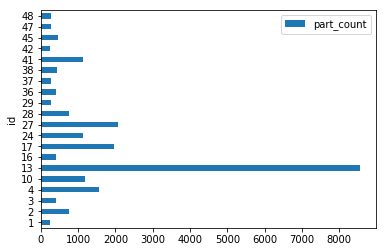

In [13]:
#2
#Plot the distribution of part categories as a (horizontal) bar chart. 
#Restrict yourself to the 20 largest part categories (in terms of the number of parts belonging to the category).
top_cat_ids = parts.groupby('part_cat_id').part_cat_id.count().sort_values(ascending=False).head(20)
top_counts = top_cat_ids.to_frame('part_count')
top_categories = pd.merge(part_categories, top_counts, left_on='id', right_on='part_cat_id')
top_categories.plot(kind='barh', x='id')



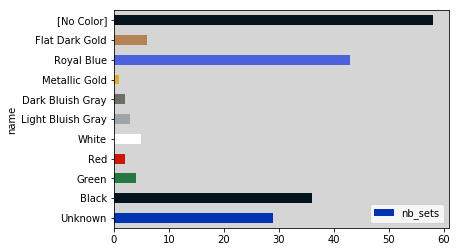

In [14]:
#3
#Find the dominant color of each set. Then, plot using a (horizontal) bar chart, the number of sets per dominant color. 
#Color each bar with the respective color that it represents.

inv_id_with_max_color = inventory_parts \
    .drop(['is_spare', 'part_id'], axis = 1) \
    .groupby(['inventory_id', 'color_id']).sum()\
    .sort_values(['inventory_id', 'quantity'], ascending=False)\
    .groupby(['inventory_id']).head(1)\
    .drop(['quantity'], axis = 1)\
    .reset_index()

set_count_per_color_id = pd.merge(inv_id_with_max_color, inventory_sets)\
    .drop(['inventory_id','quantity'], axis = 1)\
    .groupby(['color_id']).count()\
    .reset_index()\
    .rename(columns={'set_id':'nb_sets', 'color_id': 'id'})


set_count_per_color = pd.merge(set_count_per_color_id, colors)

for i in range(len(set_count_per_color)):
    set_count_per_color['rgb'][i] = '#' + set_count_per_color['rgb'][i]
    

plot = set_count_per_color.plot(kind='barh', x='name', y='nb_sets', color=set_count_per_color['rgb'])

plot.set_facecolor('#D5D5D5')

#get rid of no color and unknown



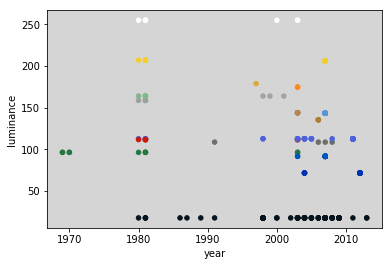

In [15]:
#4:
#Create a scatter plot of the luminance* of the sets vs their publishing year. 
#What do you observe for the years 1980-1981? How do you interpret what you see?

inv_id_with_max_col = inventory_parts \
    .drop(['is_spare', 'part_id'], axis = 1) \
    .groupby(['inventory_id', 'color_id']).sum()\
    .sort_values(['inventory_id', 'quantity'], ascending=False)\
    .drop(['quantity'], axis = 1)\
    .reset_index()

set_with_col = pd.merge(inv_id_with_max_col, inventory_sets)\
    .drop(['inventory_id','quantity'], axis = 1)\


set_with_rgb = pd.merge(set_with_col, colors, left_on='color_id', right_on='id')\
    .drop(['id', 'name', 'is_trans'], axis = 1)

set_rgb_year = pd.merge(set_with_rgb, sets, left_on='set_id', right_on='id')\
    .drop(['name', 'theme_id', 'num_parts', 'id'], axis = 1)

set_rgb_year['luminance'] = 0.0

def compute_luminance(rgb_string):
    R = int(rgb_string[0:2], 16)
    G = int(rgb_string[2:4], 16)
    B = int(rgb_string[4:6], 16)
    return math.sqrt(0.299*R*R + 0.587*G*G + 0.114*B*B)

for i in range(len(set_rgb_year)):
    set_rgb_year['luminance'][i] = compute_luminance(set_rgb_year['rgb'][i])
    set_rgb_year['rgb'][i] = '#' + set_rgb_year['rgb'][i]
    
pd.to_numeric(set_rgb_year['year'])
set_rgb_year[['year']] = set_rgb_year[['year']].apply(pd.to_numeric)


scatterplot = set_rgb_year.plot(kind='scatter', x = 'year', y = 'luminance', color=set_rgb_year['rgb'])


scatterplot.set_facecolor('#D5D5D5')

#1980 and 1981 are identical -> maybe 1981 is a copy of 1980?



__\* Briefly explain your approach for every query here \*__

## Task B. Drop the bike

*Los Angeles Metro* has been sharing publicly [anonymized *Metro Bike Share* trip data](https://bikeshare.metro.net/about/data/) under the [Open Database License (ODbL)](http://opendatacommons.org/licenses/odbl/1.0/).

In this task you will again perform data wrangling and interpretation.

### B1. Loading phase
Load the json file into a `DataFrame`.


In [49]:
BIKES_DATA_FOLDER = DATA_FOLDER + '/bikes'

In [50]:
# Write your code here
bikes = pd.read_json(BIKES_DATA_FOLDER + '/metro-bike-share-trip-data.json.zip', compression='zip').copy()

### B2. Cleaning phase
Describe the type and the value range of each attribute. Indicate and transform the attributes that are `Categorical`. Are there redundant columns in the dataset (i.e., are there columns whose value depends only on the value of another column)? What are the possible pitfalls of having such columns? Reduce *data redundancy* by extracting such columns to separate `DataFrames`. Which of the two formats (the initial one or the one with reduced data redundancy) is more susceptible to inconsistencies? At the end print for each `Dataframe` the *type of each column* and it's *shape*.

In [51]:
###### Write your code here

def isDatetime(col_name):
    return 'Time' in col_name
    
def print_info_long(frame):
    print('Info -------------------------------------------')
    for column in frame:
        print(str(column) + ': ')
        elem_type = frame[column].dtype.name
        print('Type: ' + str(elem_type))
        print('Range: {')
        if isDatetime(column):
            dates = pd.to_datetime(frame[column])    
            print(str(min(dates)) + ' - ' + str(max(dates)))
        elif elem_type == 'object' or elem_type == 'category':
            unique_elems = set(frame[column])
            for elem in unique_elems:
                print(elem)
            
        else:
            print( str(frame[column].min()) + ' - ' + str(frame[column].max()))
            
        print('}')
        print(' ')
        
    print('Shape: ' + str(frame.shape))
    
def print_info_short(frame):
    print('Info -------------------------------------------')
    for column in frame:
        print(str(column) + ': ')
        elem_type = frame[column].dtype.name
        print('Type: ' + str(elem_type))
        print(' ')
    print('Shape: ' + str(frame.shape))
    
        
print_info_long(bikes)

#Categorical:
#Passholder type
bikes['Passholder Type'] = bikes['Passholder Type'].astype('category')
#Trip Route Category
bikes['Trip Route Category'] = bikes['Trip Route Category'].astype('category')

print_info_long(bikes)


Info -------------------------------------------
Bike ID: 
Type: float64
Range: {
1349.0 - 6728.0
}
 
Duration: 
Type: int64
Range: {
60 - 86400
}
 
End Time: 
Type: object
Range: {
2016-07-07 04:20:00 - 2017-04-02 10:32:00
}
 
Ending Station ID: 
Type: float64
Range: {
3000.0 - 4108.0
}
 
Ending Station Latitude: 
Type: float64
Range: {
0.0 - 34.0642815
}
 
Ending Station Longitude: 
Type: float64
Range: {
-118.472832 - 0.0
}
 
Passholder Type: 
Type: object
Range: {
Monthly Pass
Walk-up
Staff Annual
Flex Pass
}
 
Plan Duration: 
Type: float64
Range: {
0.0 - 365.0
}
 
Start Time: 
Type: object
Range: {
2016-07-07 04:17:00 - 2017-03-31 23:45:00
}
 
Starting Station ID: 
Type: float64
Range: {
3000.0 - 4108.0
}
 
Starting Station Latitude: 
Type: float64
Range: {
0.0 - 34.0642815
}
 
Starting Station Longitude: 
Type: float64
Range: {
-118.472832 - 0.0
}
 
Trip ID: 
Type: int64
Range: {
1912818 - 23794218
}
 
Trip Route Category: 
Type: object
Range: {
One Way
Round Trip
}
 
Shape: (132

In [54]:
#Redundancies: Pitfall: if one value changes, the other not: inconsistency
#Station id <-> longitude + latitude : we only keep station ids and move lon/lat to separate table
start_stations = bikes[['Starting Station ID', 'Starting Station Latitude', 'Starting Station Longitude']
                      ].copy().drop_duplicates()
start_stations_ren = start_stations.rename(columns={'Starting Station ID': 'Station ID', 
                         'Starting Station Latitude': 'Latitude', 
                         'Starting Station Longitude':'Longitude'})

end_stations = bikes[['Ending Station ID', 'Ending Station Latitude', 'Ending Station Longitude']
                    ].copy().drop_duplicates()
end_stations_ren = end_stations.rename(columns={'Ending Station ID': 'Station ID', 
                         'Ending Station Latitude': 'Latitude', 
                         'Ending Station Longitude':'Longitude'})


stations = pd.merge(start_stations_ren, end_stations_ren).drop_duplicates()

#Passholder type <-> Plan Duration
plan_durations = bikes[['Passholder Type', 'Plan Duration']].copy().drop_duplicates()

#Round trip: Start Station Id = End station Id
trip_routes = bikes[['Ending Station ID', 'Starting Station ID', 'Trip Route Category']].copy().drop_duplicates()

#Duration <-> End time - Start time in seconds
durations = bikes[['Start Time', 'End Time', 'Duration']].copy().drop_duplicates()


In [55]:
print_info_short(stations)
print_info_short(plan_durations)
print_info_short(trip_routes)
print_info_short(durations)

Info -------------------------------------------
Station ID: 
Type: float64
 
Latitude: 
Type: float64
 
Longitude: 
Type: float64
 
Shape: (129, 3)
Info -------------------------------------------
Passholder Type: 
Type: category
 
Plan Duration: 
Type: float64
 
Shape: (5, 2)
Info -------------------------------------------
Ending Station ID: 
Type: float64
 
Starting Station ID: 
Type: float64
 
Trip Route Category: 
Type: category
 
Shape: (3703, 3)
Info -------------------------------------------
Start Time: 
Type: object
 
End Time: 
Type: object
 
Duration: 
Type: int64
 
Shape: (125912, 3)


In [56]:
bikes.drop(['Trip Route Category'], axis = 1, inplace = True)
bikes.drop(['Plan Duration'], axis = 1, inplace = True)
bikes.drop(['Starting Station Latitude', 
            'Starting Station Longitude', 
            'Ending Station Latitude', 
            'Ending Station Longitude'], axis = 1, inplace = True)
bikes.drop(['End Time'], axis = 1, inplace = True)
print_info_short(bikes)

Info -------------------------------------------
Bike ID: 
Type: float64
 
Duration: 
Type: int64
 
Ending Station ID: 
Type: float64
 
Passholder Type: 
Type: category
 
Start Time: 
Type: object
 
Starting Station ID: 
Type: float64
 
Trip ID: 
Type: int64
 
Shape: (132427, 7)


__\* Briefly explain your approach here \*__

# B3. Querying phase
Answer the following queries using the functionality of `Pandas`.

1. Plot the *distribution* of the number of outgoing trips from each station in a histogram with 20 bins (Hint: each bin describes a range of counts, not stations).
* Plot histograms for the *duration* and *trip starting hour in the day* attributes. For both the *duration*  and the *trip starting hour* use *discrete 1-hour intervals*. What do you observe in each plot? What are some popular values in the *duration* plot? Explain the local maxima and the trends you observe on the *trip starting hour* plot based on human behavior.
* For each *trip route category*, calculate the proportion of trips by *passholder type* and present your results in *a stacked bar chart with normalized height*.
* Considering only trips that begin in the morning hours (before noon), plot in *a single bar chart* the proportion of trips by *passholder type* and *trip route category*. Explain any outliers you observe.
* Separate the hours of the day into two intervals that have (approximately) the same number of bikes leaving the stations. For each of the two intervals calculate the proportion of trips by *passholder type* and *trip route category*. Present your results in a `DataFrame` which has a unique, non-composite index. Does the proportion of trips depend on whether it is the first or second hour interval? Would the company have any significant benefit by creating a more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on the second one? Assume that the number of trips per interval will not change if the scheme changes.

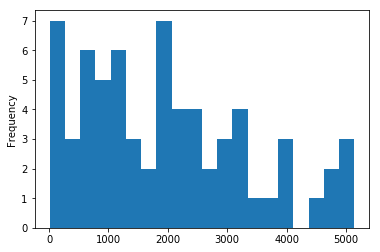

In [129]:
# Write your code here
#1
#Plot the distribution of the number of outgoing trips from each station in a histogram with 20 bins 
#(Hint: each bin describes a range of counts, not stations).
outgoing_trip_per_station = bikes['Starting Station ID'].to_frame()
outgoing_trip_per_station['Outgoing'] = 1
outgoing_trips = outgoing_trip_per_station.groupby('Starting Station ID').sum().reset_index()
outgoing = outgoing_trips['Outgoing'].sort_values()

outgoing.plot(kind='hist', bins= 20)


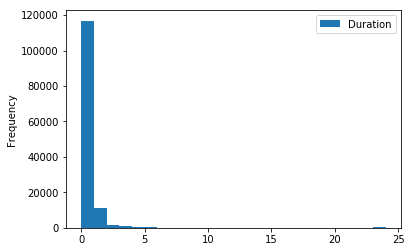

In [161]:
#2
#Plot histograms for the duration and (trip starting hour in the day) attributes. 
#For both the duration and the trip starting hour use discrete 1-hour intervals. 
#What do you observe in each plot? What are some popular values in the duration plot? 
#Explain the local maxima and the trends you observe on the trip starting hour plot based on human behavior.
durations_count = bikes['Duration'].to_frame()

length = len(durations_count['Duration'])
for i in range(length):
    duration_seconds = durations_count['Duration'][i]
    duration_hours = duration_seconds/(60 * 60)
    durations_count['Duration'][i] = round(duration_hours)

durations_count.plot(kind='hist', bins=24)

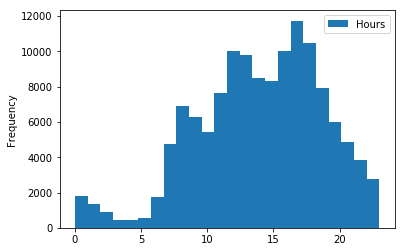

In [212]:
starting_hours = bikes['Start Time'].to_frame()

def get_hours(df, column):
    df['Hours'] = 0;
    nb_dates = len(df[column])
    for i in range(nb_dates):
        df['Hours'][i] = pd.to_datetime(df[column][i]).hour
get_hours(starting_hours, 'Start Time')
starting_hours['Hours'].to_frame().plot(kind='hist', bins=24)

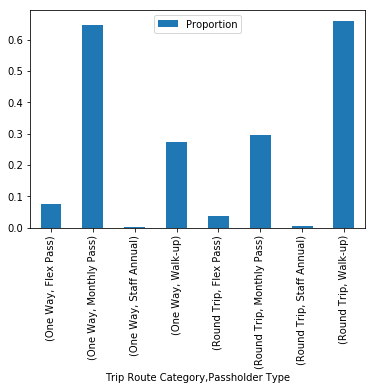

In [233]:
#3
#For each trip route category, calculate the proportion of trips by passholder type and present your 
#results in a stacked bar chart with normalized height.
bikes_with_trip_cats = pd.merge(bikes, trip_routes)[['Passholder Type', 'Trip Route Category']].copy()
bikes_with_trip_cats['Count'] = 1
trips_by_pass = bikes_with_trip_cats.groupby(['Trip Route Category', 'Passholder Type']).sum().reset_index()

count_by_trip = pd.merge(bikes, trip_routes)[['Trip Route Category']].copy()
count_by_trip['Total'] = 1
total_by_trip = count_by_trip.groupby('Trip Route Category').sum().reset_index()

with_proportion = pd.merge(trips_by_pass, total_by_trip)
with_proportion['Proportion'] = 0.0

nb_combs = len(with_proportion)
for i in range(nb_combs):
    with_proportion['Proportion'][i] = with_proportion['Count'][i]/ with_proportion['Total'][i]
    
proportion = with_proportion.drop(['Count', 'Total'], axis=1).set_index(['Trip Route Category', 'Passholder Type'])

proportion.plot(kind='bar', stacked=True)


In [214]:
#4
#Considering only trips that begin in the morning hours (before noon), plot in a single bar chart the proportion of 
#trips by passholder type and trip route category. Explain any outliers you observe.
bikes_trips = pd.merge(bikes, trip_routes)
get_hours(bikes_trips, 'Start Time')



In [221]:

bikes_trips[bikes_trips['Hours'] < 12][['Passholder Type', 'Trip Route Category']]\
    .set_index(['Passholder Type', 'Trip Route Category'])

Empty DataFrame
Columns: []
Index: [(Monthly Pass, Round Trip), (Monthly Pass, Round Trip), (Flex Pass, Round Trip), (Monthly Pass, Round Trip), (Monthly Pass, Round Trip), (Monthly Pass, Round Trip), (Monthly Pass, Round Trip), (Monthly Pass, Round Trip), (Walk-up, Round Trip), (Walk-up, Round Trip), (Walk-up, Round Trip), (Walk-up, Round Trip), (Monthly Pass, Round Trip), (Monthly Pass, Round Trip), (Monthly Pass, Round Trip), (Walk-up, Round Trip), (Walk-up, Round Trip), (Walk-up, Round Trip), (Walk-up, Round Trip), (Walk-up, Round Trip), (Walk-up, Round Trip), (Walk-up, Round Trip), (Walk-up, Round Trip), (Walk-up, Round Trip), (Monthly Pass, Round Trip), (Walk-up, Round Trip), (Walk-up, Round Trip), (Walk-up, Round Trip), (Walk-up, Round Trip), (Walk-up, Round Trip), (Walk-up, Round Trip), (Walk-up, Round Trip), (Monthly Pass, Round Trip), (Walk-up, Round Trip), (Monthly Pass, Round Trip), (Flex Pass, Round Trip), (Monthly Pass, Round Trip), (Walk-up, Round Trip), (Walk-up, Round Trip), (Walk-up, Round Trip), (Walk-up, Round Trip), (Walk-up, Round Trip), (Walk-up, Round Trip), (Walk-up, Round Trip), (Walk-up, Round Trip), (Monthly Pass, Round Trip), (Staff Annual, Round Trip), (Walk-up, Round Trip), (Walk-up, Round Trip), (Walk-up, Round Trip), (Walk-up, Round Trip), (Walk-up, Round Trip), (Monthly Pass, Round Trip), (Walk-up, Round Trip), (Walk-up, Round Trip), (Walk-up, Round Trip), (Monthly Pass, Round Trip), (Flex Pass, Round Trip), (Staff Annual, Round Trip), (Monthly Pass, Round Trip), (Walk-up, Round Trip), (Walk-up, Round Trip), (Monthly Pass, Round Trip), (Walk-up, Round Trip), (Walk-up, Round Trip), (Walk-up, Round Trip), (Walk-up, Round Trip), (Walk-up, Round Trip), (Walk-up, Round Trip), (Monthly Pass, Round Trip), (Walk-up, Round Trip), (Walk-up, Round Trip), (Walk-up, Round Trip), (Monthly Pass, Round Trip), (Walk-up, Round Trip), (Walk-up, Round Trip), (Walk-up, Round Trip), (Monthly Pass, Round Trip), (Monthly Pass, Round Trip), (Staff Annual, Round Trip), (Walk-up, Round Trip), (Flex Pass, Round Trip), (Monthly Pass, Round Trip), (Walk-up, Round Trip), (Walk-up, Round Trip), (Monthly Pass, Round Trip), (Flex Pass, Round Trip), (Monthly Pass, Round Trip), (Monthly Pass, Round Trip), (Monthly Pass, Round Trip), (Monthly Pass, Round Trip), (Walk-up, Round Trip), (Walk-up, Round Trip), (Monthly Pass, Round Trip), (Monthly Pass, Round Trip), (Walk-up, Round Trip), (Walk-up, Round Trip), (Monthly Pass, Round Trip), (Monthly Pass, Round Trip), (Monthly Pass, Round Trip), ...]

[38230 rows x 0 columns]

In [ ]:
#5
#Separate the hours of the day into two intervals that have (approximately) the same number of bikes leaving the 
#stations. For each of the two intervals calculate the proportion of trips by passholder type and trip route category. 
#Present your results in a DataFrame which has a unique, non-composite index. Does the proportion of trips depend 
#on whether it is the first or second hour interval? Would the company have any significant benefit by creating a 
#more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on 
#the second one? Assume that the number of trips per interval will not change if the scheme changes.

__\* Briefly explain your approach for every query here \*__